<a href="https://colab.research.google.com/github/FatihUlumuddin/Konversi-gambar_matlab/blob/main/konversi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

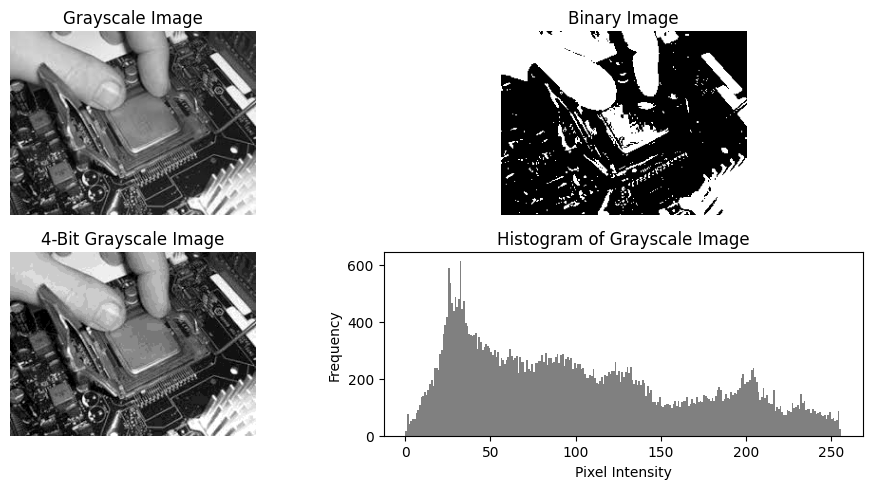

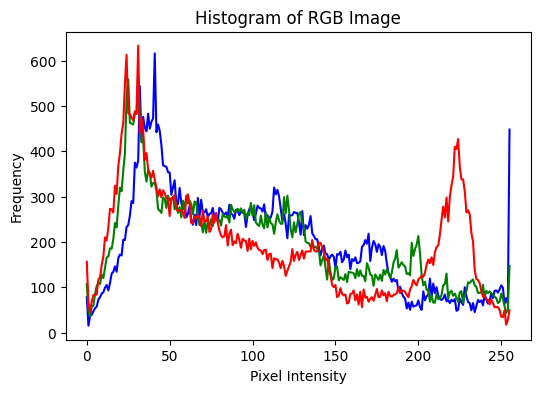

In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL dari gambar
url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjFD9XowaYPZClFUiFf1AlCsQVabEUVPpZp76dMcKHY2sZBpfK1Ve7e-p1dk7sF6KS_bO2I1jDoSkAcN74UqyR78h5eZj0XymrOIfMB2SYwn6q0P30dn8q-UsmYBgI-Yv1L2nO_pDWz15s/s1600/pasang+processsor.jpg'

# Mengunduh gambar dari URL
response = requests.get(url)
img_array = np.array(bytearray(response.content), dtype=np.uint8)

# Membaca gambar menggunakan OpenCV dari array byte
img_rgb = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Cek apakah gambar berhasil dibaca
if img_rgb is None:
    print("Error: Gambar tidak ditemukan atau path salah.")
else:
    # ===================================
    # 1. Konversi RGB ke Grayscale
    # ===================================
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

    # Menampilkan gambar grayscale
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    # ===================================
    # 2. Konversi Grayscale ke Biner
    # ===================================
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # Menampilkan gambar biner
    plt.subplot(2, 2, 2)
    plt.imshow(img_binary, cmap='gray')
    plt.title("Binary Image")
    plt.axis('off')

    # ===================================
    # 3. Konversi Grayscale ke m-Bit
    # ===================================
    m = 4  # Contoh 4-bit, bisa diubah sesuai keinginan
    img_mbit = np.floor(img_gray / (256 / (2**m))) * (256 / (2**m))

    # Menampilkan gambar m-bit
    plt.subplot(2, 2, 3)
    plt.imshow(img_mbit, cmap='gray')
    plt.title(f'{m}-Bit Grayscale Image')
    plt.axis('off')

    # ===================================
    # 4. Membuat Histogram dari Gambar Grayscale
    # ===================================
    plt.subplot(2, 2, 4)
    plt.hist(img_gray.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title("Histogram of Grayscale Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # ===================================
    # Membuat Histogram dari Gambar RGB
    # ===================================
    plt.figure(figsize=(6, 4))
    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)

    plt.title("Histogram of RGB Image")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()
